# Project 2
## Team Members 
Violeta Stoyanova
Natalie Mollaghan
Sudhan Maharjan

Identify a large 2-node network dataset—you can start with a dataset in a repository. Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

## About the Network 
BookCrossing (ratings)
This is the bipartite book rating network of the BookCrossing community. Rating values are integers between one and ten, where ten represents the best score. An edge shows that a user has rated a book. Nodes in the left column are users; nodes in the right column are books.

Data Source: 	http://www.informatik.uni-freiburg.de/~cziegler/BX/

In [58]:
# Importing packages
from networkx.algorithms import bipartite
import pandas as pd
import numpy as np
import csv
import os
from pandas import DataFrame
# Importing packages used to display images
from PIL import Image
import requests
from io import BytesIO

import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.colors as colors
from networkx import *
## Import bi-partite (bi-modal) functions
from networkx.algorithms import bipartite as bi

In [12]:
data = pd.read_csv("C:\\Users\\Violet\\Desktop\\out.bookcrossing_rating_rating", sep=" ",header=None)
data.columns=['Users','Books','Weight']
data.head(10)

,Users,Books,Weight
0,1,1,5
1,2,2,3
2,2,3,6
3,3,4,8
4,4,5,6
5,5,6,7
6,6,7,10
7,7,8,9
8,7,9,9
9,7,10,8


In [13]:
def nx_graph_from_biadjacency_pandas_df(df):
    B = nx.Graph()
    for i in df.index:
        B.add_node(i, bipartite=0)
        for j in df.columns:
            B.add_node(j, bipartite=1)
            if (df.ix[i,j] > 0):
                B.add_edge(i, j, weight=df.ix[i,j])
    return B

In [14]:
B = nx_graph_from_biadjacency_pandas_df(data)

C:\Users\Violet\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\Violet\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [15]:
nx.is_connected(B)

True

In [16]:
bottom_nodes, top_nodes = bipartite.sets(B)

In [17]:
print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 433655
Number of edges: 1300956
Average degree:   6.0000


In [18]:
users = top_nodes
books = bottom_nodes

In [19]:
# Creates a new bipartite graph from a biadjacency matrix given as a SciPy sparse matrix.
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(B, users, books))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	2
  (0, 2)	2
  (0, 3)	3
  (0, 4)	4
  (0, 5)	5
  (0, 6)	6
  (0, 7)	7
  (0, 8)	7
  (0, 9)	7
  (0, 10)	7
  (0, 11)	7
  (0, 12)	8
  (0, 13)	9
  (0, 14)	10
  (0, 15)	11
  (0, 16)	12
  (0, 17)	13
  (0, 18)	13
  (0, 19)	13
  (0, 20)	13
  (0, 21)	14
  (0, 22)	15
  (0, 23)	15
  (0, 24)	15
  :	:
  (2, 433627)	10
  (2, 433628)	6
  (2, 433629)	7
  (2, 433630)	7
  (2, 433631)	6
  (2, 433632)	2
  (2, 433633)	6
  (2, 433634)	10
  (2, 433635)	10
  (2, 433636)	8
  (2, 433637)	10
  (2, 433638)	7
  (2, 433639)	10
  (2, 433640)	10
  (2, 433641)	10
  (2, 433642)	6
  (2, 433643)	7
  (2, 433644)	6
  (2, 433645)	5
  (2, 433646)	7
  (2, 433647)	5
  (2, 433648)	9
  (2, 433649)	10
  (2, 433650)	10
  (2, 433651)	8


Implement the Island Method

The first thing we need to implement for the island method is a function to virtually raise the water level. The function below takes a graph, and applies a threshold (“water level”), letting all edges above a certain value through, and removing all others.

Then define how the water level should be raised. Compute evenly spaced thresholds and produce a list of networks at each water level:

In [71]:
[len(users),len(books)]


[3, 433652]

In [72]:
U= bi.projected_graph(B, users)

In [73]:
#check the number of subgraphs
len(list(nx.connected_component_subgraphs(U)))

1

In [77]:
def trim_edges(g, weight=1):
   """Method from Social Network Analysis for Startups"""
   
   g2=nx.Graph()
   for f, to , edata in e.edges(data=True):
     if edata['weight'] > weight:
       g2.add_edge(f, to, edata)
     
   return g2

Now, let’s define how the water level should be raised. We will compute evenly spaced thresholds and produce a list of networks at each water level:

In [65]:
#This function will return a list of graph objects, each corresponding to a specific water level.
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]

    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)

    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [67]:
cc=nx.connected_component_subgraphs(B)[0]
islands=island_method(cc)
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print i[0], len(i[1]), len(nx.connected_component_subgraphs(i[1]))


SyntaxError: invalid syntax (<ipython-input-67-2a6bccf586d4>, line 5)

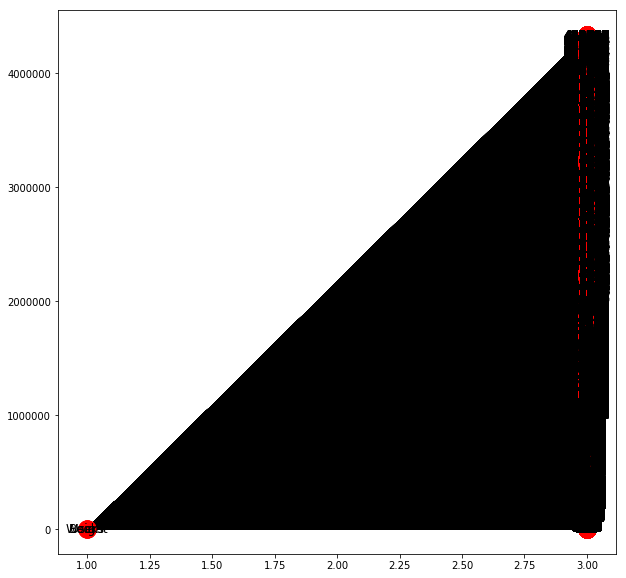

In [76]:
plt.figure(figsize = (10, 10))
pos = dict()
pos.update( (n, (1, i*10)) for i, n in enumerate(women) ) # put nodes from Users at x=1
pos.update( (n, (3, i*10)) for i, n in enumerate(clubs) ) # put nodes from Books at x=2
nx.draw_networkx(G, pos=pos, with_labels=True)

Unfortunately, we were unsuccessful in implementing the island method because of the dataset. 